In [2]:
function Lagrange(X, Y, xi)
    n = length(X)
    result = 0
    for i=1:n
        term = Y[i]
        for j=1:n
            if i != j
                term=term*(xi - X[j])/(X[i]-X[j])
             end
        end
        result += term
    end
    return result
end 

Lagrange (generic function with 1 method)

In [3]:
function diffs(X, Y, i)
    n = length(X)
    M = zeros(n)
    for j=1:n-i
        M[j]=(Y[j + 1, i + 1] - Y[j, i + 1])/(X[j + i] - X[j])
    end
    Y[:,2+i] = M
end

diffs (generic function with 1 method)

In [4]:
function Newton(X, Y)
    n = length(X)
    M=zeros(n, n+2)
    M[:,1] = X
    M[:,2] = Y
    for i=1:n
        diffs(X, M, i)
    end
    return M
end

Newton (generic function with 1 method)

In [5]:
function Value(Coefs, xi)
    sum = Coefs[1,2]
    n = length(Coefs[:,1]) - 1
    for i=1:n
        prod = Coefs[1, i + 2]
        for j=1:i
            prod *= (xi - Coefs[j,1])
        end
        sum += prod
    end
    return sum
end

Value (generic function with 1 method)

In [5]:
using Polynomials
using Plots

x = 1:10
f_x = rand(10) * 10

x_s = 1:0.1:10
l_y_s = [Lagrange(x, f_x, xi) for xi in x_s]

dif = Newton(x, f_x)
n_y_s = [Value(dif, xi) for xi in x_s]

fit1=polyfit(x, f_x)
p_y_s = [fit1(x) for x in x_s]

91-element Array{Float64,1}:
   9.167709246983577  
  32.24835849794408   
  44.359706181219735  
  48.61287957832974   
  47.488185694649474  
  42.93016420441381   
  36.43208089258269   
  29.110688513302193  
  21.772040867177566  
  14.969105764881988  
   9.05188339307142   
   4.2106984298652606 
   0.5132970716358614 
   ⋮                  
   2.5370077037455303 
   0.17397679726627757
  -2.8882596859712066 
  -6.554793573035113  
 -10.619143798169262  
 -14.72925042416      
 -18.347650478787727  
 -20.705228323323354  
 -20.747896827639124  
 -17.07552803216595   
  -7.872413447390954  
   9.171505234141023  

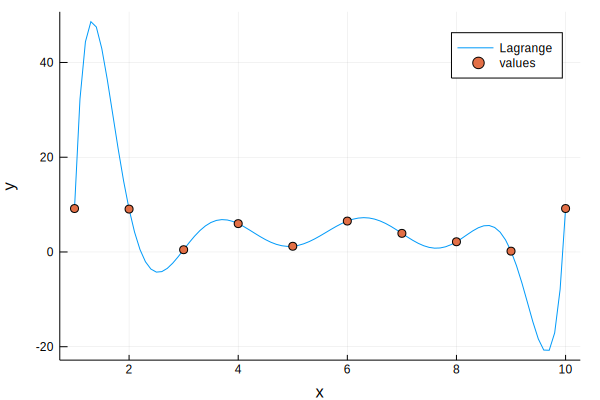

In [6]:
plot(x_s, l_y_s, label="Lagrange")
scatter!(x, f_x, label="values")
xlabel!("x")
ylabel!("y")

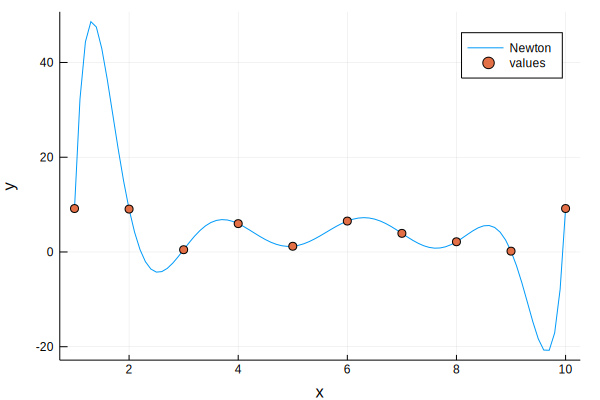

In [7]:
plot(x_s, n_y_s, label="Newton")
scatter!(x, f_x, label="values")
xlabel!("x")
ylabel!("y")

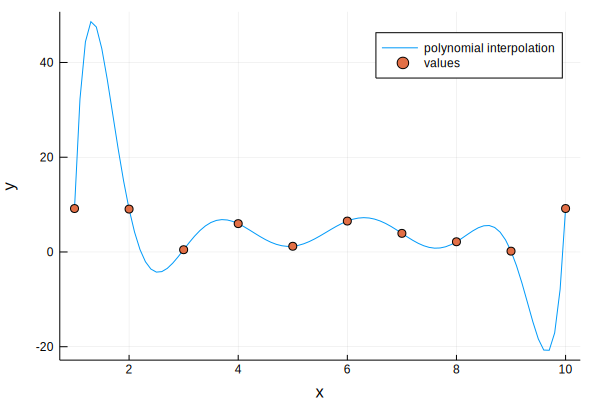

In [8]:
plot(x_s, p_y_s, label="polynomial interpolation")
scatter!(x, f_x, label="values")
xlabel!("x")
ylabel!("y")

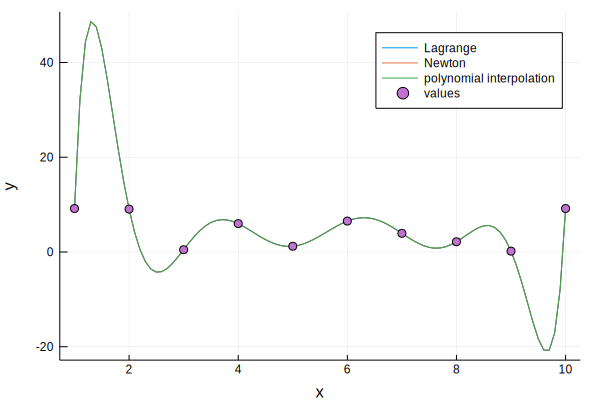

In [9]:
plot(x_s, l_y_s, label="Lagrange")
plot!(x_s, n_y_s, label="Newton")
plot!(x_s, p_y_s, label="polynomial interpolation")
scatter!(x, f_x, label="values")
xlabel!("x")
ylabel!("y")

In [10]:
function NewtonWrapper(x, f_x, x_s)
    dif = Newton(x, f_x)
    [Value(dif, xi) for xi in x_s]
end

NewtonWrapper (generic function with 1 method)

In [11]:
function PolyWrapper(x, f_x, x_s)
    fit1=polyfit(x, f_x)
    [fit1(x) for x in x_s]
end

PolyWrapper (generic function with 1 method)

In [37]:
using DataFrames
using Polynomials
df1=DataFrame(size = Int[], lagrange = Float64[], newton = Float64[], poly = Float64[])

for i=10:10:100
    for j=1:10
        x = 1:i
        f_x = rand(i)
        x_s = 1:0.1:i
        
        
        lagrange = @elapsed [Lagrange(x, f_x, xi) for xi in x_s]

        #if lagrange > 5
            #lagrange = df1[:lagrange][i - 10]
        #end

        newton = @elapsed NewtonWrapper(x, f_x, x_s)

        #if newton > 0.005
            #newton = df1[:newton][i - 10]
        #end

        poly = @elapsed PolyWrapper(x, f_x, x_s)

        #if poly > 0.005
            #poly = df1[:poly][i - 10]
        #end
        push!(df1, [i lagrange newton poly])
    end
end

show(df1)

100×4 DataFrame
│ Row │ size  │ lagrange  │ newton     │ poly       │
│     │ Int64 │ Float64   │ Float64    │ Float64    │
├─────┼───────┼───────────┼────────────┼────────────┤
│ 1   │ 10    │ 0.0954138 │ 2.22e-5    │ 5.12e-5    │
│ 2   │ 10    │ 4.92e-5   │ 1.46e-5    │ 1.0e-5     │
│ 3   │ 10    │ 3.9201e-5 │ 1.58e-5    │ 7.0e-6     │
│ 4   │ 10    │ 3.72e-5   │ 1.55e-5    │ 6.0e-6     │
│ 5   │ 10    │ 3.7501e-5 │ 1.46e-5    │ 6.3e-6     │
│ 6   │ 10    │ 3.87e-5   │ 1.33e-5    │ 6.3e-6     │
│ 7   │ 10    │ 3.86e-5   │ 1.2401e-5  │ 6.0e-6     │
⋮
│ 93  │ 100   │ 0.193778  │ 0.00521664 │ 0.00183031 │
│ 94  │ 100   │ 0.193313  │ 0.00503353 │ 0.00163831 │
│ 95  │ 100   │ 0.194467  │ 0.00498033 │ 0.00185061 │
│ 96  │ 100   │ 0.189607  │ 0.00534854 │ 0.00170501 │
│ 97  │ 100   │ 0.192951  │ 0.00654595 │ 0.00174461 │
│ 98  │ 100   │ 0.191282  │ 0.00545044 │ 0.00166391 │
│ 99  │ 100   │ 0.193426  │ 0.00523654 │ 0.00173261 │
│ 100 │ 100   │ 0.190495  │ 0.00536714 │ 0.00185931 │

In [38]:
using Statistics

df2 = by(df1, :size, df->DataFrame(lagrange_mean=mean(df[:lagrange]), lagrange_std=std(df[:lagrange]),
        newton_mean=mean(df[:newton]), newton_std=std(df[:newton]), poly_mean=mean(df[:poly]),
    poly_std=std(df[:poly])))

,size,lagrange_mean,lagrange_std,newton_mean,newton_std,poly_mean,poly_std
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,10,0.00958132,0.0301585,1.51701e-5,2.66073e-6,1.143e-5,1.40308e-5
2,20,0.000379853,8.25268e-6,6.48104e-5,1.57019e-5,4.80804e-5,4.94317e-5
3,30,0.00142768,1.92673e-5,0.000189681,1.7316e-5,0.00434426,0.0130655
4,40,0.0189176,0.0320032,0.000395242,1.51131e-5,0.000306722,7.35455e-5
5,50,0.0223304,0.0321164,0.000717395,1.8001e-5,0.00793063,0.0236307
6,60,0.0422711,0.0383406,0.00972554,0.026952,0.00843695,0.0237907
7,70,0.057763,0.0391772,0.00951586,0.0241628,0.0312332,0.0390975
8,80,0.105296,0.00200884,0.0172336,0.0304884,0.00856774,0.0230423
9,90,0.141674,0.039609,0.00473102,0.00277816,0.0239412,0.0362459


In [6]:
using Polynomials
using Plots

lagrange_fit=polyfit(df2[:size], df2[:lagrange_mean], 3)
newton_fit=polyfit(df2[:size], df2[:newton_mean], 3)
poly_fit=polyfit(df2[:size], df2[:poly_mean], 3)

scatter(df2[:size], [df2[:lagrange_mean], df2[:newton_mean], df2[:poly_mean]],
    yerr=[df2[:lagrange_std] df2[:newton_std] df2[:poly_std]], label=["lagrange" "newton" "poly"], 
    legend=:topleft)

plot!(df2[:size], polyval(lagrange_fit, df2[:size]), label="lagrange_fit")
plot!(df2[:size], polyval(newton_fit, df2[:size]), label="newton_fit")
plot!(df2[:size], polyval(poly_fit, df2[:size]), label="poly_fit")
title!("Porównanie interpolacji")
xlabel!("Liczba punktów")
ylabel!("Czas obliczania")

UndefVarError: UndefVarError: df2 not defined

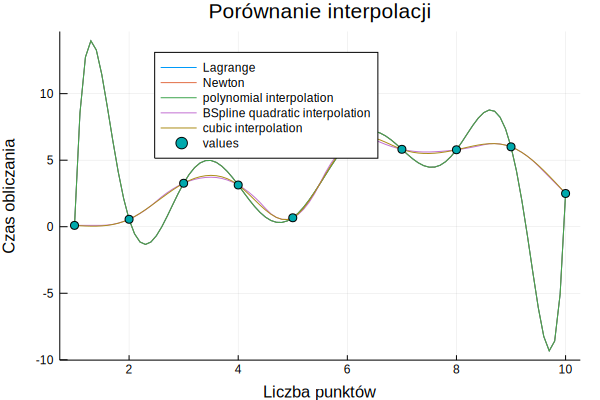

In [7]:
using Interpolations

x = 1:10
f_x = rand(10) * 10

x_s = 1:0.1:10
l_y_s = [Lagrange(x, f_x, xi) for xi in x_s]

dif = Newton(x, f_x)
n_y_s = [Value(dif, xi) for xi in x_s]

fit1=polyfit(x, f_x)
p_y_s = [fit1(x) for x in x_s]

itp = interpolate(f_x, BSpline(Quadratic(Line(OnCell()))))
q_y_s =[itp(xi) for xi in x_s]

interp_cubic = CubicSplineInterpolation(x, f_x)
c_y_s = [interp_cubic(xi) for xi in x_s]

plot(x_s, l_y_s, label="Lagrange", legend=:top)
plot!(x_s, n_y_s, label="Newton")
plot!(x_s, p_y_s, label="polynomial interpolation")
plot!(x_s, q_y_s, label="BSpline quadratic interpolation")
plot!(x_s, c_y_s, label="cubic interpolation")
scatter!(x, f_x, label="values")
title!("Porównanie interpolacji")
xlabel!("Liczba punktów")
ylabel!("Czas obliczania")

Poly(0.9999999999979368 - 2.6174650102942354e-12*x - 22.775927440664304*x^2 - 1.246240945198597e-11*x^3 + 351.9839477607178*x^4 + 4.6230993713393356e-10*x^5 - 3100.352387382602*x^6 - 3.450750763994766e-9*x^7 + 15206.746706360627*x^8 + 1.2073687865110391e-8*x^9 - 41869.96840843623*x^10 - 2.1404510002107396e-8*x^11 + 63743.77448013304*x^12 + 1.846084321534627e-8*x^13 - 49713.454101852236*x^14 - 6.126500377026153e-9*x^15 + 15403.08415239581*x^16)


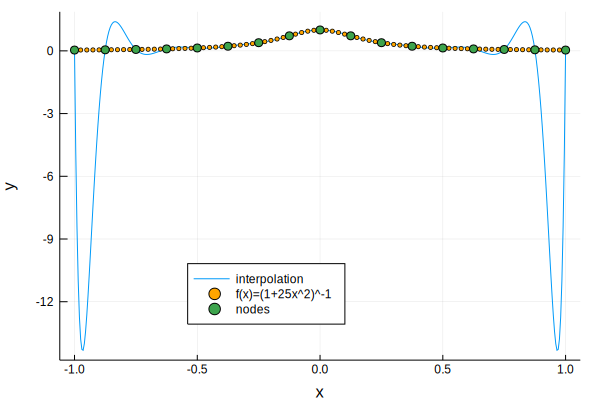

In [41]:
using Polynomials
using Plots

function f(x)
    return (1+25*x^2)^-1
end

x = -1:0.125:1
f_x = [f(xi) for xi in x]

x_s = -1:0.005:1
fit1 = polyfit(x, f_x)
p_y_s = [fit1(x) for x in x_s]

f_x_s = -1:0.025:1
f_y_s = [f(x) for x in f_x_s]

println(fit1)

plot(x_s, p_y_s, label="interpolation", legend=:bottom)
scatter!(f_x_s, f_y_s, label="f(x)=(1+25x^2)^-1", color="orange", marker = (:dot, 2))
scatter!(x, f_x, label="nodes")
xlabel!("x")
ylabel!("y")

In [17]:
function Coefficients(X, Y, Z)
    M = ones(4,4)
    XY = ones(4)
    
    for i=1:4
        XY[i] = X[i]*Y[i]
    end
    
    M[:,2] = X
    M[:,3] = Y
    M[:,4] = transpose(XY)
    
    A = inv(M) * Z
    return A
end

Coefficients (generic function with 1 method)

In [18]:
function Bilinear_value(x, y, Coeffs)
    return Coeffs[1] + Coeffs[2]*x + Coeffs[3]*y + Coeffs[4] * x * y
end

Bilinear_value (generic function with 1 method)

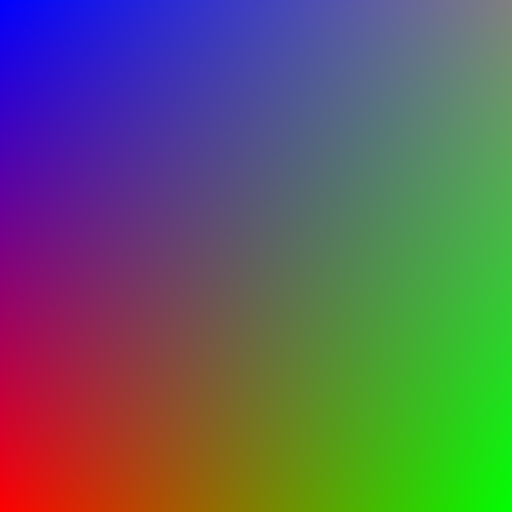

In [24]:
using Plots

X=[0, 0, 1, 1]
Y=[0, 1, 0, 1]
Z_R=[1, 0, 0, 0.5]
Z_G=[0, 1, 0, 0.5]
Z_B=[0, 0, 1, 0.5]
Coeffs_R = Coefficients(X, Y, Z_R)
Coeffs_G = Coefficients(X, Y, Z_G)
Coeffs_B = Coefficients(X, Y, Z_B)

image = zeros(RGB, 512 ,512)

for i=1:512
    for j=1:512
        R = Bilinear_value(i / 512, j / 512, Coeffs_R)
        G = Bilinear_value(i / 512, j / 512, Coeffs_G)
        B = Bilinear_value(i / 512, j / 512, Coeffs_B)
        image[513-i, j] = RGB(R, G, B)
    end
end

image

In [20]:
using Images, TestImages

function resize_image(image, new_w, new_h)
    w = length(image[1,:])
    h = length(image[:,1])
    
    x_ratio = w / new_w
    y_ratio = h / new_h
    
    tmp = zeros(RGB, new_h, new_w) 
    
    for i=0:new_w-1
        for j=0:new_h-1
            x = floor(Int, (i * x_ratio))
            y = floor(Int, (j * y_ratio))
            tmp[j + 1, i + 1] = image[y + 1, x + 1]
        end
    end
    return tmp
end

resize_image (generic function with 1 method)

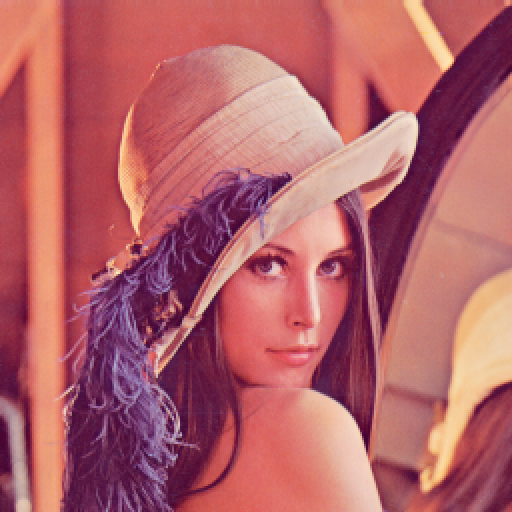

In [25]:
image2 = testimage("lena_color_256")
w = length(image2[1,:])

#println(image2)

img2 = resize_image(image2, 512, 512)
img2

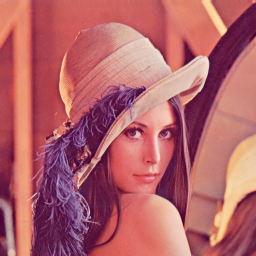

In [22]:
image2